### CW ODMR

In [2]:
# note that the programe does not import again once it was imported, which means config will not be updated until one restarts the kernel 
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm.simulate import SimulationConfig
from configuration import config
import time
import numpy as np
import matplotlib.pyplot as plt

# harvard_ip = '140.247.189.50'
local_ip = '192.168.50.97'
qmm = QuantumMachinesManager(host=local_ip, port='80')
# qmm = QuantumMachinesManager(host=harvard_ip, port='80')

with program() as odmr:
    with infinite_loop_():
        # update_frequency('e_spin', f)
        play('reset', 'reset_laser')
        align()
        play('const', 'e_spin')
        play('readout', 'resonant_read_laser')
        wait(200, 'e_spin')
        # measure('tt_window', 'snspd', None, time_tagging.analog(times, tt_window_len, counts))
        align()

qm = qmm.open_qm(config)
job = qm.execute(odmr)

2022-02-17 16:32:15,954 - qm - INFO - Performing health check
2022-02-17 16:32:15,956 - qm - INFO - Health check passed
2022-02-17 16:32:16,078 - qm - INFO - Flags: 
2022-02-17 16:32:16,079 - qm - INFO - Sending program to QOP
2022-02-17 16:32:16,131 - qm - INFO - Executing program


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AE6D-EB50

 Directory of c:\Users\User\Dropbox (Lukin SiV)\SiV Quick Sharing\QM\test

01/31/2022  10:46 AM    <DIR>          .
01/31/2022  10:46 AM    <DIR>          ..
01/31/2022  02:24 PM    <DIR>          __pycache__
01/31/2022  02:23 PM             7,691 configuration.py
01/28/2022  12:35 PM               460 generate_time_tagger_signal.py
02/04/2022  11:31 AM            49,307 odmr_test.ipynb
01/28/2022  06:02 PM             2,151 test.py
02/04/2022  11:04 AM            69,478 time_tagger_test.ipynb
               5 File(s)        129,087 bytes
               3 Dir(s)  1,615,242,489,856 bytes free


2022-02-04 11:31:23,980 - qm - INFO - Flags: 
2022-02-04 11:31:23,981 - qm - INFO - Simulating program


Text(0, 0.5, 'Signal [V]')

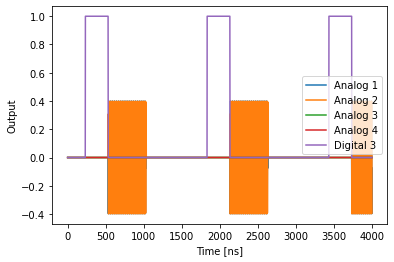

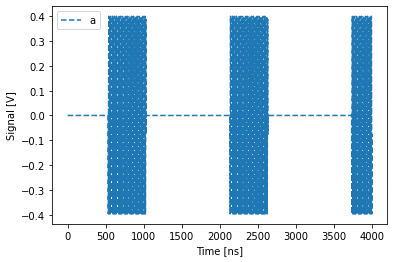

In [4]:
# OPX Simulate
job = qmm.simulate(config, odmr, SimulationConfig(duration=1000,
                                        include_analog_waveforms=True,    # include analog waveform names (default True)
                                        include_digital_waveforms=True ))   # include digital waveform  (default True))


# get DAC and digital samples
samples = job.get_simulated_samples()

# plot analog ports:
samples.con1.plot(analog_ports={'1', '2', '3', '4'}, digital_ports={'3'})

# another way:
plt.figure()
plt.plot(samples.con1.analog["1"], "--")
plt.legend(( "analog 1"))
plt.xlabel("Time [ns]")
plt.ylabel("Signal [V]")


## Decoupling sequence

### just test X and Y pulses

In [1]:
# note that the programe does not import again once it was imported, which means config will not be updated until one restarts the kernel 
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm.simulate import SimulationConfig
from configuration import config
import time
import numpy as np
import matplotlib.pyplot as plt

local_ip = '192.168.50.97'
qmm = QuantumMachinesManager(host=local_ip, port='80')
# qmm = QuantumMachinesManager(host=harvard_ip, port='80')

with program() as odmr:
    with infinite_loop_():
        # update_frequency('e_spin', f)
        play('const', 'e_spin')
        play('const_y', 'e_spin')
        play('readout', 'resonant_read_laser')
        wait(20, 'e_spin')
        # measure('tt_window', 'snspd', None, time_tagging.analog(times, tt_window_len, counts))
        align()

qm = qmm.open_qm(config)
job = qm.execute(odmr)

2022-02-07 11:55:32,553 - qm - INFO - Performing health check
2022-02-07 11:55:32,557 - qm - INFO - Health check passed
2022-02-07 11:55:32,614 - qm - INFO - Flags: 
2022-02-07 11:55:32,614 - qm - INFO - Sending program to QOP
2022-02-07 11:55:32,653 - qm - INFO - Executing program


2022-02-07 11:55:33,376 - qm - INFO - Flags: 
2022-02-07 11:55:33,377 - qm - INFO - Simulating program


Text(0, 0.5, 'Signal [V]')

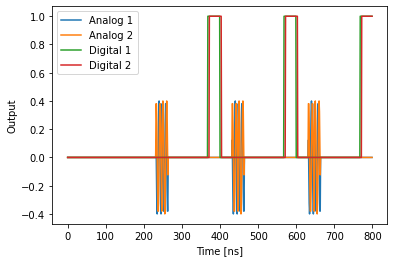

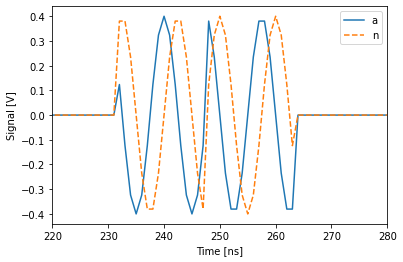

In [2]:
# OPX Simulate
job = qmm.simulate(config, odmr, SimulationConfig(duration=200,
                                        include_analog_waveforms=True,    # include analog waveform names (default True)
                                        include_digital_waveforms=True ))   # include digital waveform  (default True))


# get DAC and digital samples
samples = job.get_simulated_samples()

# plot analog ports:
samples.con1.plot(analog_ports={'1', '2',}, digital_ports={'1', '2'})

# another way:
plt.figure()
plt.plot(samples.con1.analog["1"], "-")
plt.plot(samples.con1.analog["2"], "--")
plt.xlim([220, 280])
plt.legend(( "analog 1"))
plt.xlabel("Time [ns]")
plt.ylabel("Signal [V]")
